#Priority Queue Implementation

In [235]:
# importing modules 
import numpy as np
# from scipy.sparse import random
from numpy.random import random_integers
from numpy.random import default_rng
from scipy import stats
from random import randint
import numpy as np 
import pandas as pd 
import sys
import scipy 
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import Image
import pprint
from py2puml.py2puml import py2puml


In [178]:
class PriorityQueue(object):
    def __init__(self):
        self.queue = []
    
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
    
    # if empty return True
    def isEmpty(self):
        return len(self.queue) == 0
    
    # vertex is stored with distance
    # vertex 2 with distance 20: (2, 20)
    def insert(self, vertex):
        self.queue.append(vertex)
    
    def get_smallest(self):
        min_val = sys.maxsize
        min_index = 0
        for i in range(len(self.queue)):
            if self.queue[i][1]<min_val:
                min_val = self.queue[i][1]
                min_index = i
        smallest = self.queue[min_index]
        del(self.queue[min_index])
        return smallest

    def remove_vertex(self, vertex):
        for i in range(len(self.queue)):
            if self.queue[i][0] == vertex:
                item = self.queue[i]
                del(self.queue[i])
                return item
    

In [179]:
# Min Heap Implementation 
# things to note: 
# our index starts from 0 -> capacity-1

class MinHeap:
    '''Each vertex obj has its vertexNum, distance from source 
    i.e: each element in storage will take the form '''
    def __init__ (self, capacity):
        # storage contains [node, distance from src] 
        self.storage = [] 
        self.capacity = capacity
        # number of elements currently in our heap 
        self.size = 0
        self.comparisons = 0 

    def getParentIndex(self,index):
        # if index-1 <= 0: return -100
        return (index-1)//2
    def getLeftChildIndex(self,index):
        return 2*index+1
    def getRightChildIndex(self,index):
        return 2*index+2
         
    def hasParent(self, index):
        return self.getParentIndex(index) >= 0
    def hasLeftChild(self, index):
        return self.getLeftChildIndex(index) < self.size
    def hasRightChild(self, index):
        return self.getRightChildIndex(index) < self.size

    def parent(self, index):
        return self.storage[self.getParentIndex(index)]
    def leftChild(self, index):
        return self.storage[self.getLeftChildIndex(index)]
    def rightChild(self, index):
        return self.storage[self.getRightChildIndex(index)]


    def isFull(self):
        return self.size == self.capacity 
    def isEmpty(self):
        return self.size <= 0
    
    def swap(self, i1, i2):
        self.storage[i1], self.storage[i2] = self.storage[i2], self.storage[i1]
    
    def insert(self, vertex):
        if(self.isFull()):
            raise("Heap is full")
        self.storage.append(vertex)
        self.size += 1 
        self.heapifyUp() 

    def heapifyUp(self):
        # print("heapifyUp curr size", self.size)
        index = self.size-1
        while(self.hasParent(index) and self.parent(index)[1] > self.storage[index][1]):
            self.comparisons += 1
            self.swap(self.getParentIndex(index), index)
            index = self.getParentIndex(index)
        # print("after heapifyUp", self.storage)
        
    def removeMin(self):
        if(self.size==0):
            raise("Empty Heap")
        node = self.storage[0]
        # print("removeMin Node", node)
        self.storage[0] = self.storage[self.size-1]
        del self.storage[self.size-1]
        self.size -=1
        self.heapifyDown(0)
        return node
    
    def removeVertex(self, vertex):
       for i in range(self.size):
            # print(self.storage[i][0])
            if self.storage[i][0] == vertex:
                #print("vertex: ", vertex, " storage: ", self.storage)
                self.swap(i, self.size-1)
                del self.storage[self.size-1]
                self.size -= 1
                self.heapifyDown(i)
                #print("after heapifyDown: ", self.storage)
                break
    
    def heapifyDown(self, index):
        while(self.hasLeftChild(index)):
            smallerChildIndex = self.getLeftChildIndex(index)
            self.comparisons += 1
            if(self.hasRightChild(index) and self.rightChild(index)[1]< self.leftChild(index)[1]):
                smallerChildIndex = self.getRightChildIndex(index)
            if (self.storage[index][1] < self.storage[smallerChildIndex][1]):
                break
            else:
                self.swap(index, smallerChildIndex)
            index = smallerChildIndex


    def getKeyComparisons(self) :
        return self.comparisons


In [241]:
class Graph():
    
    def __init__(self, v):
        self.V = v #number of nodes
        self.graph = [[0 for column in range(v)]for row in range(v)]
        self.adjL = {}
        self.d = [sys.maxsize for x in range(v)]
        self.pi =[None for x in range(v)]
        self.S = [0 for x in range(v)]
        self.comparisonsMHTotal, self.comparisonsDijkstraMH = 0, 0
        self.comparisonsArrTotal, self.comparisonsDijkstraArr = 0, 0
        
    def getSize(self):
        return self.V
    def adjList(self):
        for i in range(self.V):
            adjNodes = []
            for j in range(self.V):
                if self.graph[i][j]:
                    # (adjNode, weight), adjNodes[0] == the adjNode, adjNodes[1] == 
                    # the distance between node current node i and node j
                    adjNodes.append((j,self.graph[i][j]))
            self.adjL[i] = adjNodes
    

    # def addNode(self, v, u, w, queue):
    #     for position ,node in enumerate(queue):
    #         if self.d[v] < self.d[node]:
    #             queue[position] = v
    #             return
    
    def dijkstra(self,source):
        self.d[source] = 0
        pq = PriorityQueue()
        for i in range(self.V):
            pq.insert((i,self.d[i]))
    
        while(pq.isEmpty()==False):
            u = pq.get_smallest()
            # u = (node, weight)
            self.S[u[0]] = 1
            # for each v adjacent to u 
            for i in range(self.V):
                if self.graph[u[0]][i]> 0 and self.S[i] != 1 and self.d[i] > self.d[u[0]] + self.graph[u[0]][i]:
                    pq.remove_vertex(i)
                    self.d[i] = self.d[u[0]] + self.graph[u[0]][i]
                    self.pi[i] = u[0]
                    pq.insert((i,self.d[i]))

    def dijkstraHQ(self, source):
        # reinitializing 
        self.d[source] = 0 
      
        pq2 = MinHeap(self.V) 

        for i in range(self.V):
            pq2.insert([i, self.d[i]])
    

        
        while(pq2.isEmpty() == False):
            u = pq2.removeMin() 
            self.S[u[0]] = 1
            # for each v= (node, weight) adj to u[0]
            for v in self.adjL[u[0]]:
                if self.S[v[0]] != 1 and self.d[v[0]] > self.d[u[0]] + v[1]:
                    pq2.removeVertex(v[0])
                    self.d[v[0]] = self.d[u[0]] + v[1]
                    self.pi[v[0]] = u[0]
                    pq2.insert([v[0], self.d[v[0]]])
            

    def printSolution(self):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", self.d[node])
        self.S = [0 for x in range(self.V)]
        self.d = [sys.maxsize for x in range(self.V)]
        self.pi =[None for x in range(self.V)]

    
    def getKeyComparisons(self, useMinHeap):
        if (useMinHeap):
            totalComps = self.comparisonsMH + self.comparisonsDijkstraMH 
            return totalComps
        else:
            totalComps = self.comparisonsArr + self.comparisonsDijkstraArr
            return totalComps
                

In [187]:
# params : n == the number of nodes, density == the number of edges that one node can connect to. density has to be less than or equal to n-1. 
def generateConnectedGraph(n, density):
    mat = [[0 for i in range(n)] for j in range (n)]
    setOfConnectedNodes = []
    i = 0
    while (i < n):
        # weight = randint(1,10)
        setOfConnectedNodes.append(i)
        if (i <= 1):
            weight = randint(1,n)
            if (i == 1):
                mat[0][1] = weight
                mat[1][0] = weight
            i+=1
            continue 

        for j in range(density+1):
            weight = randint(1,10)
            adjI = randint(0, i-1)
            adj = setOfConnectedNodes[adjI]
            mat[i][adj] = weight
            mat[adj][i] = weight
        
        i+=1
    
    return mat

In [188]:
import time 
start = time.time() 
g.dijkstra(0) 
end = time.time() 
print("With Array", (end-start)*10**6, "microsecs")

With Array 79.87022399902344 microsecs


In [189]:
def runDijkstraHQ(g, source):
    g.adjList()
    start = time.time() 
    g.dijkstraHQ(source)
    end = time.time() 
    # print("With Min Heap ", (end-start)* 10**6, "microsecs")
    # print("---------Soln using Min Heap----------")
    # g.printSolution()
    return (end-start)* 10**6


In [190]:
def runDijkstra(g, source):
    start = time.time() 
    g.dijkstra(source)
    end = time.time() 
    # print("With Array ", (end-start)* 10**6, "microsecs")
    # print("---------Soln using Array (Priority Queue)----------")
    # g.printSolution()
    return (end-start)* 10**6


In [191]:
n = 10
g2 = Graph(n)
# S2= np.fill_diagonal(S, 0)
g2.graph = generateConnectedGraph(n,1)
runDijkstra(g2, 0)
runDijkstraHQ(g2, 0)

72.00241088867188

In [192]:
g3 = Graph(5)
g3.graph = generateConnectedGraph(5,4)

In [193]:
generateConnectedGraph(5,density=1)

[[0, 5, 8, 0, 0],
 [5, 0, 3, 10, 0],
 [8, 3, 0, 1, 2],
 [0, 10, 1, 0, 7],
 [0, 0, 2, 7, 0]]

In [194]:
generateConnectedGraph(5, density=3)

[[0, 3, 7, 4, 9],
 [3, 0, 10, 0, 10],
 [7, 10, 0, 1, 0],
 [4, 0, 1, 0, 5],
 [9, 10, 0, 5, 0]]

In [195]:
generateConnectedGraph(10, density=8)

[[0, 9, 2, 3, 10, 7, 0, 0, 3, 2],
 [9, 0, 7, 9, 3, 8, 8, 10, 1, 0],
 [2, 7, 0, 9, 3, 0, 1, 5, 7, 6],
 [3, 9, 9, 0, 2, 7, 4, 0, 2, 0],
 [10, 3, 3, 2, 0, 0, 0, 4, 6, 10],
 [7, 8, 0, 7, 0, 0, 4, 1, 9, 2],
 [0, 8, 1, 4, 0, 4, 0, 2, 9, 8],
 [0, 10, 5, 0, 4, 1, 2, 0, 10, 0],
 [3, 1, 7, 2, 6, 9, 9, 10, 0, 1],
 [2, 0, 6, 0, 10, 2, 8, 0, 1, 0]]

In [196]:
graphTestMat = generateConnectedGraph(10, density=10)

In [197]:
graphTest = Graph(10)
graphTest.graph = graphTestMat
graphTest.dijkstra(0)
graphTest.printSolution()

Vertex 	Distance from Source
0 	 0
1 	 1
2 	 4
3 	 4
4 	 2
5 	 4
6 	 5
7 	 6
8 	 4
9 	 4


# Empirical Average Time 
1. Use Priority Queue implemented by Array (howMany == 10)
    a. change density with same n (obtain average of 10 such graphs, for each density step)
        - n = 100 
        - n = 200 
        - n = 300 
    
    b. change n with same density 
        - density = 50 for n = 200, 300, 400
        - density = 100 for n = 200, 300, 400 
        - density = 200 for n = 200, 300, 400 


2. Use Min Heap (howMany == 10)
    a. change density with same n 
    b. change n with same density 

## Function Definitions 

In [198]:
# howMany, is to generate how many different datas, to calculate the average for that certain density, and n 
def AvgTime(n, howMany,useMinHeap, density):
    time = []
    for i in range(howMany):
        gMat = generateConnectedGraph(n, density)
        g = Graph(n)
        g.graph = gMat 
    
        if (useMinHeap):
            time.append(runDijkstraHQ(g, 0))
        else: 
            time.append(runDijkstra(g, 0))

    return sum(time)/len(time)
            




In [199]:
def obtainDFChangeDensity(n, useMinHeap):
    data = pd.DataFrame() 
    den = [] 
    avgTime = [] 
    # take note that density cannot be larger than n 

    for i in range (0,n+1,2):
        graphDensity = i 
        if i == 0:
            # need to use graphDensity  >= 1
            graphDensity = 1 
        avgTime.append(AvgTime(n, 10, useMinHeap, graphDensity))
        den.append(graphDensity)


    data['density'] = den 
    data['average time'] = avgTime 

    return data

In [200]:
# nArr holds the array of values of n 
def obtainDFChangeN(nArr, density, useMinHeap):
    data = pd.DataFrame()
    avgTime = []

    for n in nArr: 
        # generate average time for density 
        avgTime.append(AvgTime(n, 10, useMinHeap, density))

    data ['n'] = nArr 
    data['average time'] = avgTime
    return data 


In [201]:
def drawGraph(gMat, n):

    gMatArr = np.array(gMat)
    gDraw = nx.from_numpy_array(gMatArr)

    nx.draw_networkx(gDraw)


## Array Implementation

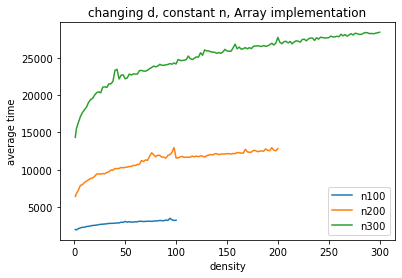

In [232]:
n100 = obtainDFChangeDensity(100, False)
n200 = obtainDFChangeDensity(200, False)
n300 = obtainDFChangeDensity(300, False)

plt.plot(n100['density'], n100['average time'], label="n100")
plt.plot(n200['density'], n200['average time'], label="n200")
plt.plot(n300['density'], n300['average time'], label="n300")
plt.xlabel("density")
plt.ylabel("average time")
plt.legend()
plt.title("changing d, constant n, Array implementation")
plt.show()


In [234]:
nArr = [200,300,400,500,600]
densitiesToTest = [50,100,200,300]
d50 = obtainDFChangeN(nArr, densitiesToTest[0], False)
d100 = obtainDFChangeN(nArr, densitiesToTest[1], False)
d200 = obtainDFChangeN(nArr, densitiesToTest[2], False)
d300 = obtainDFChangeN(nArr, densitiesToTest[3], False)

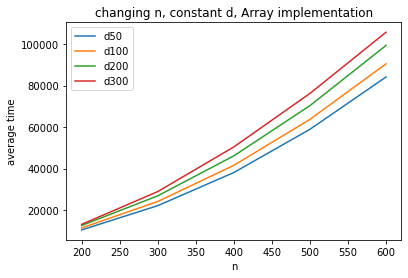

In [233]:
plt.plot(d50['n'], d50['average time'], label="d50")
plt.plot(d100['n'], d100['average time'], label="d100")
plt.plot(d200['n'], d200['average time'], label="d200")
plt.plot(d300['n'], d300['average time'], label="d300")

plt.xlabel("n")
plt.ylabel("average time")
plt.legend()
plt.title("changing n, constant d, Array implementation")
plt.show()


## Using Min Heap

In [206]:
n100MH = obtainDFChangeDensity(100, useMinHeap=True)
n200MH = obtainDFChangeDensity(200, True)
n300MH = obtainDFChangeDensity(300, True)

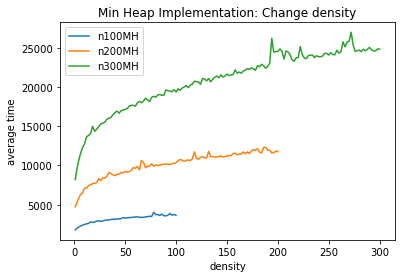

In [207]:
plt.plot(n100MH['density'], n100MH['average time'], label="n100MH")
plt.plot(n200MH['density'], n200MH['average time'], label="n200MH")
plt.plot(n300MH['density'], n300MH['average time'], label="n300MH")
plt.xlabel("density")
plt.ylabel("average time")
plt.title("Min Heap Implementation: Change density")
plt.legend()
plt.show()

In [208]:
nArr = [200,300,400,500,600]
densitiesToTest = [50,100,200,300]
d50MH = obtainDFChangeN(nArr, densitiesToTest[0], True)
d100MH = obtainDFChangeN(nArr, densitiesToTest[1], True)
d200MH = obtainDFChangeN(nArr, densitiesToTest[2], True)
d300MH = obtainDFChangeN(nArr, densitiesToTest[3], True)

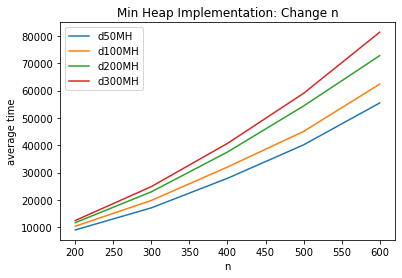

In [209]:
plt.plot(d50MH['n'], d50MH['average time'], label="d50MH")
plt.plot(d100MH['n'], d100MH['average time'], label="d100MH")
plt.plot(d200MH['n'], d200MH['average time'], label="d200MH")
plt.plot(d300MH['n'], d300MH['average time'], label="d300MH")

plt.xlabel("n")
plt.ylabel("average time")
plt.title("Min Heap Implementation: Change n")
plt.legend()
plt.show()

# Min Heap vs Array 

## Changing density 

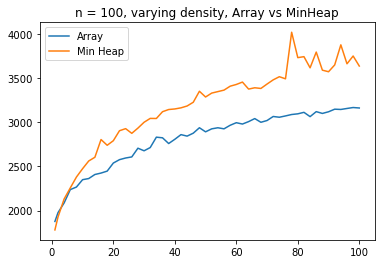

In [210]:
# n = 100 
plt.plot(n100['density'], n100['average time'], label="Array")
plt.plot(n100MH['density'], n100MH['average time'], label="Min Heap")
plt.title("n = 100, varying density, Array vs MinHeap")
plt.legend()
plt.show()

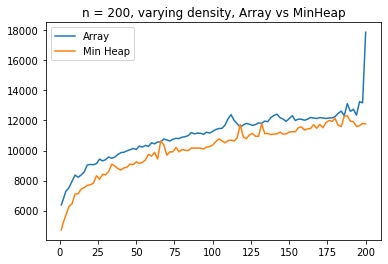

In [211]:
# n = 200 
plt.plot(n200['density'], n200['average time'], label="Array")
plt.plot(n200MH['density'], n200MH['average time'], label="Min Heap")
plt.title("n = 200, varying density, Array vs MinHeap")
plt.legend()
plt.show()

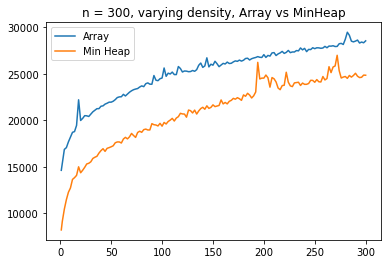

In [212]:
# n = 300
# n = 100 
plt.plot(n300['density'], n300['average time'], label="Array")
plt.plot(n300MH['density'], n300MH['average time'], label="Min Heap")
plt.title("n = 300, varying density, Array vs MinHeap")
plt.legend()
plt.show()

## Changing n

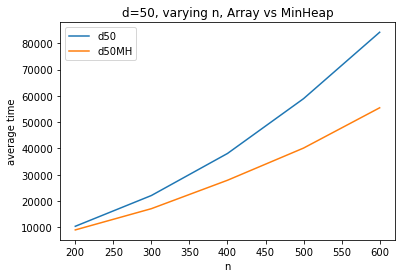

In [213]:
# d = 50 
plt.plot(d50['n'], d50['average time'], label="d50")
plt.plot(d50MH['n'], d50MH['average time'], label="d50MH")

plt.xlabel("n")
plt.ylabel("average time")
plt.title("d=50, varying n, Array vs MinHeap")
plt.legend()
plt.show()

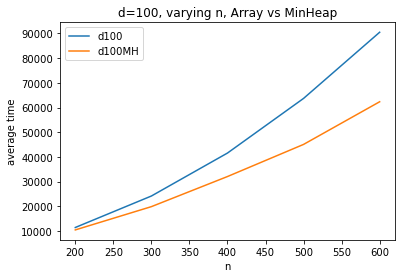

In [214]:
# d = 100
plt.plot(d100['n'], d100['average time'], label="d100")
plt.plot(d100MH['n'], d100MH['average time'], label="d100MH")

plt.xlabel("n")
plt.ylabel("average time")
plt.title("d=100, varying n, Array vs MinHeap")
plt.legend()
plt.show()

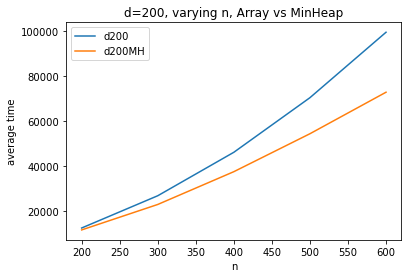

In [215]:
# d = 200
plt.plot(d200['n'], d200['average time'], label="d200")
plt.plot(d200MH['n'], d200MH['average time'], label="d200MH")

plt.xlabel("n")
plt.ylabel("average time")
plt.title("d=200, varying n, Array vs MinHeap")
plt.legend()
plt.show()

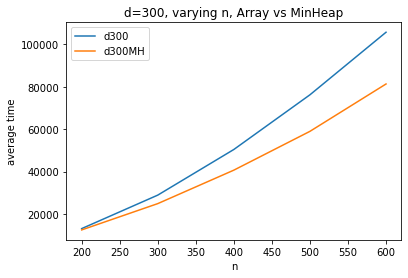

In [216]:
# d = 300
plt.plot(d300['n'], d300['average time'], label="d300")
plt.plot(d300MH['n'], d300MH['average time'], label="d300MH")

plt.xlabel("n")
plt.ylabel("average time")
plt.title("d=300, varying n, Array vs MinHeap")
plt.legend()
plt.show()

# What about when d == 1? 

In [217]:
d1 = obtainDFChangeN(nArr, 1, False)
d1MH = obtainDFChangeN(nArr, 1, True)

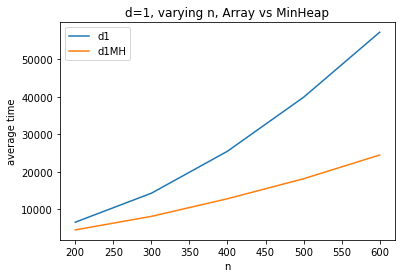

In [218]:
# d = 1
plt.plot(d1['n'], d1['average time'], label="d1")
plt.plot(d1MH['n'], d1MH['average time'], label="d1MH")

plt.xlabel("n")
plt.ylabel("average time")
plt.title("d=1, varying n, Array vs MinHeap")
plt.legend()
plt.show()

# Worst Case: Complete Graph

In [219]:
def createCompleteGraph(n, draw): 
    gMat = [[0 for i in range(n)] for j in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            w = randint(1,n*2)
            gMat[i][j] = w
            gMat[j][i] = w
    if draw: 
        drawGraph(gMat, n)
    return gMat

[[0, 9, 5, 2, 8],
 [9, 0, 1, 2, 6],
 [5, 1, 0, 9, 4],
 [2, 2, 9, 0, 3],
 [8, 6, 4, 3, 0]]

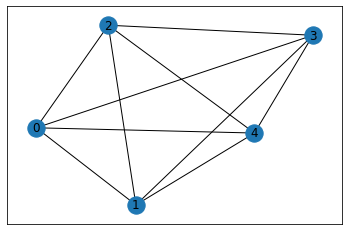

In [220]:
# test to draw complete graph 

createCompleteGraph(5,True)

In [221]:
def AvgTimeComplete(n, howMany,useMinHeap):
    time = []
    for i in range(howMany):
        gMat = createCompleteGraph(n, False)
        g = Graph(n)
        g.graph = gMat 
    
        if (useMinHeap):
            time.append(runDijkstraHQ(g, 0))
        else: 
            time.append(runDijkstra(g, 0))

    return sum(time)/len(time)

In [222]:
# Avg time of Complete graphs of n = [100,200,300] vs graphs of n = [100,200,300] with density = 1 
nArr = [100, 200,300,400, 500, 600]
avgTimeArr = pd.DataFrame() 
avgTimeMH = pd.DataFrame()
# 1. Use Array
completeAvgTime = []
d1AvgTime = [] 
for n in nArr:
    completeAvgTime.append(AvgTimeComplete(n, 10, False))
    d1AvgTime.append(AvgTime(n, 10, False, 1))
avgTimeArr["n"], avgTimeArr["completeAvgTime"], avgTimeArr["d1AvgTime"] = nArr, completeAvgTime, d1AvgTime
# 2. Use Mean Heap 
completeAvgTime = [] 
d1AvgTime = [] 
for n in nArr:
    completeAvgTime.append(AvgTimeComplete(n, 10, True))
    d1AvgTime.append(AvgTime(n, 10, True, 1))
avgTimeMH["n"], avgTimeMH["completeAvgTime"], avgTimeMH["d1AvgTime"] = nArr, completeAvgTime, d1AvgTime


In [223]:
avgTimeArr

,n,completeAvgTime,d1AvgTime
0,100,4145.431519,1763.772964
1,200,16550.087929,6601.452827
2,300,38951.516151,14623.332024
3,400,76281.619072,26751.852036
4,500,120235.824585,40503.573418
5,600,164687.824249,57427.453995


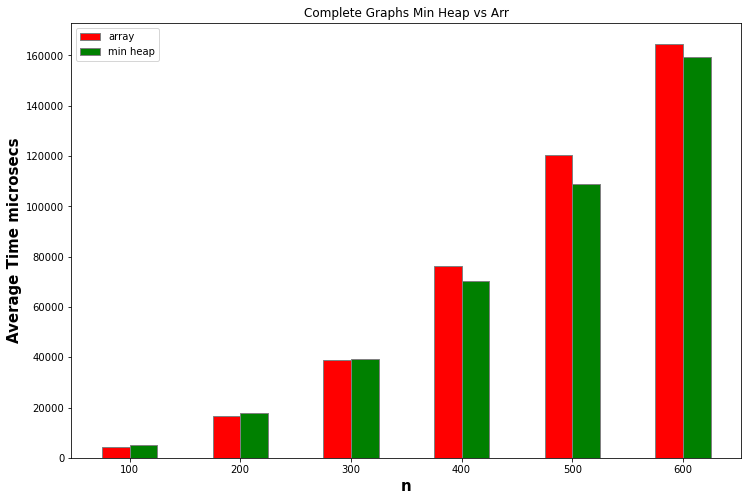

In [224]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(nArr))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, avgTimeArr["completeAvgTime"], color ='r', width = barWidth,
        edgecolor ='grey', label ='array')
plt.bar(br2, avgTimeMH["completeAvgTime"], color ='g', width = barWidth,
        edgecolor ='grey', label ='min heap')
 
# Adding Xticks
plt.xlabel('n', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Time microsecs', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.5*barWidth for r in range(len(nArr))],
       nArr)
plt.title("Complete Graphs Min Heap vs Arr")
 
plt.legend()
plt.show()

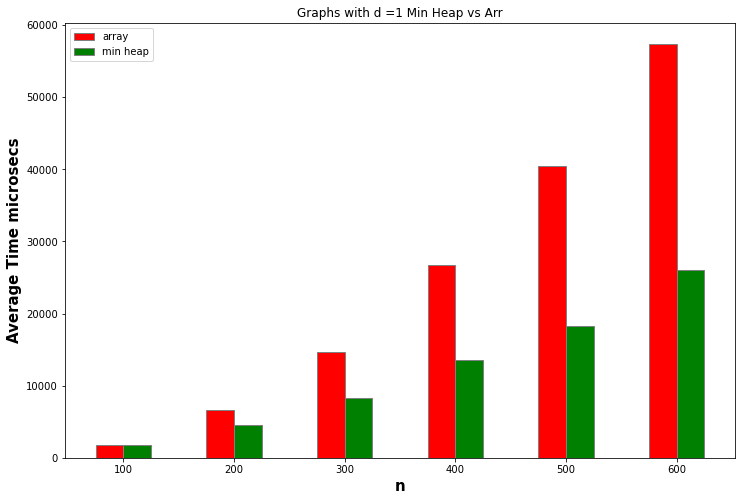

In [225]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# Set position of bar on X axis
br1 = np.arange(len(nArr))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, avgTimeArr["d1AvgTime"], color ='r', width = barWidth,
        edgecolor ='grey', label ='array')
plt.bar(br2, avgTimeMH["d1AvgTime"], color ='g', width = barWidth,
        edgecolor ='grey', label ='min heap')
 
# Adding Xticks
plt.xlabel('n', fontweight ='bold', fontsize = 15)
plt.ylabel('Average Time microsecs', fontweight ='bold', fontsize = 15)
plt.xticks([r + 0.5*barWidth for r in range(len(nArr))],
       nArr)
plt.title("Graphs with d =1 Min Heap vs Arr")
 
plt.legend()
plt.show()

# The best case for array implementation? 


In [226]:

def bestCase(n, draw):
    gBest = [[0 for i in range(n)] for j in range(n)]
    for i in range(1,n):
        w = randint(1,10)
        if i == n-1: 
            # node 99 always connected back to node 0 
            gBest[i][0] = w
            gBest[0][i] = w

        
        gBest[i][i-1] = w
        gBest[i-1][i] = w

    if (draw):
        gBestArr = np.array(gBest)
        gBestDraw = nx.from_numpy_array(gBestArr)
        nx.draw_networkx(gBestDraw)

    gBestGraph = Graph(n)
    gBestGraph.graph = gBest 
    return gBestGraph


In [227]:
g20B = bestCase(20, False)
g30B = bestCase(30, False)
g40B = bestCase(40, False)
g50B = bestCase(50, False)
g100B = bestCase(100, False)
g200B = bestCase(200, False)
g300B = bestCase(300, False)
g600B = bestCase(600, False)

bestGraphs = [g20B, g30B, g40B, g50B, g100B, g200B, g300B, g600B]
names = ['g20B', 'g30B', 'g40B','g50B', 'g100B', 'g200B', 'g300B', 'g600B']


In [228]:
data = pd.DataFrame()
avgTimeMH = [] 
avgTimeArr = []
for graph in bestGraphs:
    avgTimeMH.append(sum(runDijkstraHQ(graph, 0)for i in range(10))/10)
    avgTimeArr.append(sum(runDijkstra(graph, 0) for i in range(10))/10)
data["type of best"], data["avgTimeArr"], data["avgTimeMH"] = names, avgTimeArr, avgTimeMH

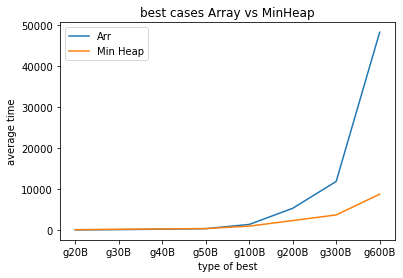

In [229]:
plt.plot(data["type of best"], data["avgTimeArr"], label="Arr")
plt.plot(data["type of best"], data['avgTimeMH'], label="Min Heap")

plt.xlabel("type of best")
plt.ylabel("average time")
plt.title("best cases Array vs MinHeap")
plt.legend()
plt.show()

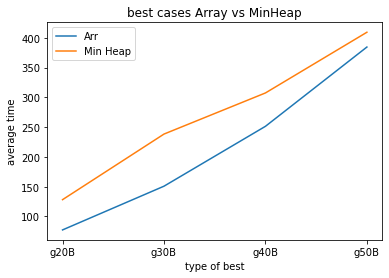

In [230]:
plt.plot(data["type of best"][:4], data["avgTimeArr"][:4], label="Arr")
plt.plot(data["type of best"][:4], data['avgTimeMH'][:4], label="Min Heap")

plt.xlabel("type of best")
plt.ylabel("average time")
plt.title("best cases Array vs MinHeap")
plt.legend()
plt.show()

# Drafts/ Unwanted below this cell 

In [ ]:
# n100 = pd.read_csv('n100.csv')
# n200 = pd.read_csv('n200.csv')
# n300 = pd.read_csv('n300.csv')

# n100MH = pd.read_csv('n100MH.csv')
# n200MH = pd.read_csv('n200MH.csv')
# n300MH = pd.read_csv('n300MH.csv')

# d50 = pd.read_csv('d50.csv')
# d100 = pd.read_csv('d100.csv')
# d200 = pd.read_csv('d200.csv')
# d300 = pd.read_csv('d300.csv')

# d50MH = pd.read_csv('d50.csv')
# d100MH = pd.read_csv('d100MH.csv')
# d200MH = pd.read_csv('d200MH.csv')
# d300MH = pd.read_csv('d300MH.csv')

# g = Graph(9)
# g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
#     [4, 0, 8, 0, 0, 0, 0, 11, 0],
#     [0, 8, 0, 7, 0, 4, 0, 0, 2],
#     [0, 0, 7, 0, 9, 14, 0, 0, 0],
#     [0, 0, 0, 9, 0, 10, 0, 0, 0],
#     [0, 0, 4, 14, 10, 0, 2, 0, 0],
#     [0, 0, 0, 0, 0, 2, 0, 1, 6],
#     [8, 11, 0, 0, 0, 0, 1, 0, 7],
#     [0, 0, 2, 0, 0, 0, 6, 7, 0]
#     ]
# G = nx.DiGraph()
# # edge_list = [(1,2,{'w':'A1'}),(2,1,{'w':'A2'}),(2,3,{'w':'B'}),(3,1,{'w':'C'}),
# #              (3,4,{'w':'D1'}),(4,3,{'w':'D2'}),(1,5,{'w':'E1'}),(5,1,{'w':'E2'}),
# #              (3,5,{'w':'F'}),(5,4,{'w':'G'})]

# edge_list = []
# for i in range(len(g.graph)):
#     for j in range(len(g.graph)):
#         if g.graph[i][j] == 0:
#             continue
#         tup = (i, j, {'w': str(g.graph[i][j])})
#         edge_list.append(tup)
# G.add_edges_from(edge_list)
# pos=nx.spring_layout(G,seed=5)
# fig, ax = plt.subplots()
# nx.draw_networkx_nodes(G, pos, ax=ax)
# nx.draw_networkx_labels(G, pos, ax=ax)
# fig.savefig("1.png", bbox_inches='tight',pad_inches=0)
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
fig.savefig("2.png", bbox_inches='tight',pad_inches=0)
# import my_networkx as my_nx
# edge_weights = nx.get_edge_attributes(G,'w')
# curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
# straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
# my_nx.my_draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=curved_edge_labels,rotate=False,rad = arc_rad)
# nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=straight_edge_labels,rotate=False)
# fig.savefig("3.png", bbox_inches='tight',pad_inches=0)
# Image(filename='3.png') 

# g2 = Graph(9)
# g2.graph = [row[:] for row in g.graph]
# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(g2.graph)
# g2.dijkstra(0)
# g2.printSolution()